/tmp/ipython-input-448360860.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


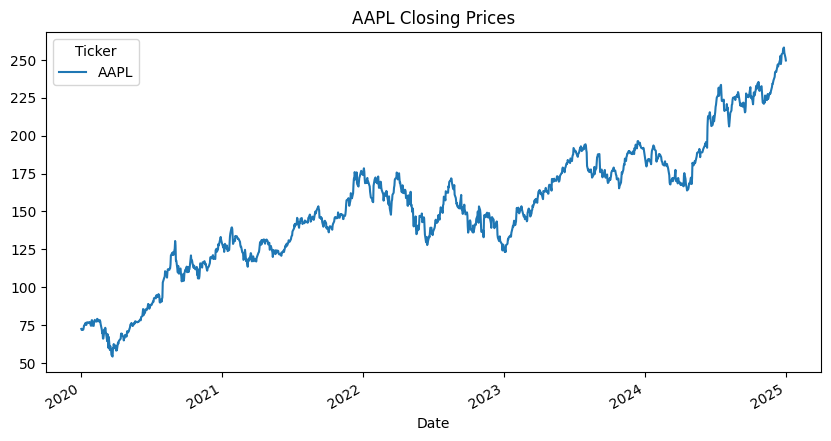

Training MA model...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

Training ARMA model...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/

Training ARIMA model...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


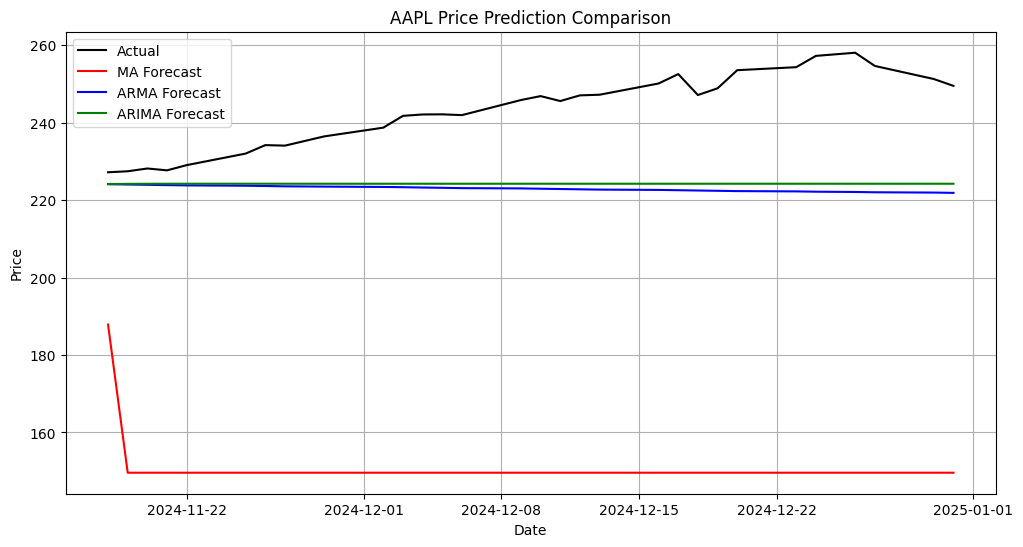

✅ All models and test data saved successfully!

Model Performance (RMSE):
MA     : 93.2227
ARMA   : 22.4934
ARIMA  : 21.0951


In [5]:
# =====================================================
# 🧠 Stock Price Prediction: MA, ARMA, ARIMA Comparison
# =====================================================

# STEP 1: Install dependencies
!pip install yfinance statsmodels joblib matplotlib pandas numpy --quiet

# STEP 2: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import joblib

# STEP 3: Download Stock Data
ticker = "AAPL"   # You can change this to any stock symbol
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
data = data["Close"]
data.plot(title=f"{ticker} Closing Prices", figsize=(10,5))
plt.show()

# STEP 4: Split Data
train = data[:-30]
test = data[-30:]

# STEP 5: Train Models

# --- MA Model (q=1) ---
print("Training MA model...")
ma_model = ARIMA(train, order=(0,0,1)).fit()
ma_forecast = ma_model.forecast(steps=30)

# --- ARMA Model (p=2, q=1) ---
print("Training ARMA model...")
arma_model = ARIMA(train, order=(2,0,1)).fit()
arma_forecast = arma_model.forecast(steps=30)

# --- ARIMA Model (p=2, d=1, q=1) ---
print("Training ARIMA model...")
arima_model = ARIMA(train, order=(2,1,1)).fit()
arima_forecast = arima_model.forecast(steps=30)

# STEP 6: Visualize Comparisons
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label="Actual", color="black")
plt.plot(test.index, ma_forecast, label="MA Forecast", color="red")
plt.plot(test.index, arma_forecast, label="ARMA Forecast", color="blue")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="green")
plt.title(f"{ticker} Price Prediction Comparison")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# STEP 7: Save Models and Test Data
joblib.dump(ma_model, "ma_model.pkl")
joblib.dump(arma_model, "arma_model.pkl")
joblib.dump(arima_model, "arima_model.pkl")
test.to_csv("test_data.csv")

print("✅ All models and test data saved successfully!")

# STEP 8: (Optional) Model Evaluation - RMSE
from sklearn.metrics import mean_squared_error
import math

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

print("\nModel Performance (RMSE):")
print(f"MA     : {rmse(test, ma_forecast):.4f}")
print(f"ARMA   : {rmse(test, arma_forecast):.4f}")
print(f"ARIMA  : {rmse(test, arima_forecast):.4f}")
